In [1]:
from init import *
from hytraj import HyData, HyGen, Receptor  # , MultiReceptor

autotime loaded.
black loaded.
black loaded.
time: 878 ms


<IPython.core.display.Javascript object>

In [2]:
def surface_ozone():
    filenames = glob.glob("/media/pankaj/Data/reprobus/surf_ozo/*")
    kwargs = dict(skiprows=range(30))
    data = pd.DataFrame([])
    for filename in filenames:
        name = filename.split("/")[-1]
        df = pd.read_csv(filename, sep="\s+", skiprows=range(28), parse_dates=True)[
            ["C32", "TIME.1"]
        ]
        df.columns = ["Date", name]
        df.index = pd.to_datetime(df.Date)
        df[name][abs(df[name]) > 100] = np.nan
        data = pd.concat([data, df], axis=1)
    data = data[["syow", "mcmu", "spol", "neum", "marb", "arht"]]
    return data

time: 1.28 ms


<IPython.core.display.Javascript object>

In [3]:
working = "/home/pankaj/phd/code/hytraj/working/"
metdir = "/home/pankaj/Desktop/met/"
outdir = "/home/pankaj/Desktop/hysplit/out/"
hysplit = "/home/pankaj/phd/code/hytraj/working/hyts_std"

time: 531 µs


<IPython.core.display.Javascript object>

In [4]:
height = 500
run_time = -120
dates = pd.date_range("2010-02-01", freq="24H", end="2010-02-28")
dates

DatetimeIndex(['2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04',
               '2010-02-05', '2010-02-06', '2010-02-07', '2010-02-08',
               '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12',
               '2010-02-13', '2010-02-14', '2010-02-15', '2010-02-16',
               '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-20',
               '2010-02-21', '2010-02-22', '2010-02-23', '2010-02-24',
               '2010-02-25', '2010-02-26', '2010-02-27', '2010-02-28'],
              dtype='datetime64[ns]', freq='24H')

time: 3.57 ms


<IPython.core.display.Javascript object>

In [5]:
stations = {
    "Davis": (-69, 78),
    "South Pole": (-90, 335),
    "Neumayer": (-71, 352),
    "Marambio": (-64, 303),
    "Maitri": (-70, 11),
}

time: 778 µs


<IPython.core.display.Javascript object>

In [6]:
hy = HyGen(
    stations,
    height,
    run_time,
    working,
    metdir,
    outdir,
    met_type="ncep",
    exe=hysplit,
)
hy = hy.run(dates, vertical=0, model_top=10000.0)

100%|██████████| 28/28 [20:43<00:00, 44.41s/it]

time: 20min 43s


<IPython.core.display.Javascript object>

In [7]:
files = sorted(glob.glob("/home/pankaj/Desktop/hysplit/out/ncep*"))
hy = HyData(files, list(stations.keys()))
data = hy.read()
data

<xarray.Dataset>
Dimensions:     (geo: 4, step: 121, time: 28)
Coordinates:
  * step        (step) int64 0 1 2 3 4 5 6 7 ... 113 114 115 116 117 118 119 120
  * time        (time) datetime64[ns] 2010-02-01 2010-02-02 ... 2010-02-28
  * geo         (geo) <U3 'lat' 'lon' 'alt' 'pre'
Data variables:
    Davis       (geo, step, time) float64 -69.0 -69.0 -69.0 ... 694.1 574.6
    South Pole  (geo, step, time) float64 -90.0 -90.0 -90.0 ... 541.1 851.3
    Neumayer    (geo, step, time) float64 -71.0 -71.0 -71.0 ... 542.3 774.8
    Marambio    (geo, step, time) float64 -64.0 -64.0 -64.0 ... 1.01e+03 995.3
    Maitri      (geo, step, time) float64 -70.0 -70.0 -70.0 ... 1.012e+03 598.9

time: 277 ms


<IPython.core.display.Javascript object>

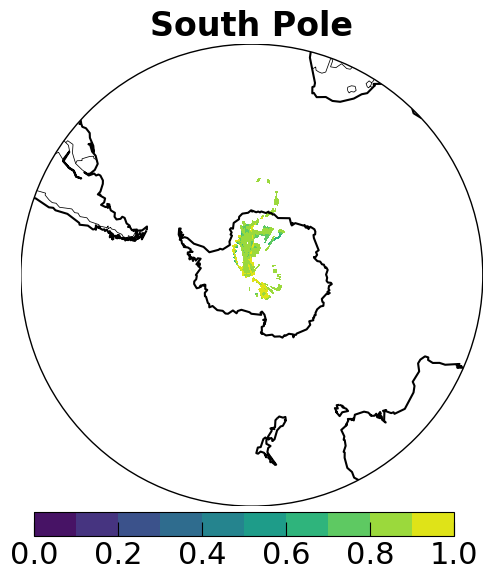

time: 571 ms


<IPython.core.display.Javascript object>

In [12]:
ozone = surface_ozone()["spol"].loc["2010-02-01":"2010-02-28"]
model = Receptor(ozone, data, station_name="South Pole")
cwt = model.calculate_cwt(weighted=False)
pscf = model.calculate_pscf(thresh=0.95)
rtwc = model.calculate_rtwc(normalise=True)
model.plot_map(rtwc, boundinglat=-25)
plt.show()